In [ ]:
!pip install opencv-python

In [3]:
# sample for video capturing    
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [3]:
!pip install scikit-image

     ---------------------------------------- 12.7/12.7 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 313.5/313.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 225.5/225.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: lazy-loader
    Found existing installation: lazy_loader 0.3
    Uninstalling lazy_loader-0.3:
      Successfully uninstalled lazy_loader-0.3


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import seaborn as sns
from random import seed
from random import randint

# Function to load image data and labels for a specific fruit and type (Train/Test)
def load_data(manhole, tipo):
    # Initialize lists to store images and labels
    label = []
    arr = []
    # Fetch file paths for the given fruit and type using glob
    strr = "/content/drive/MyDrive/Manhole detection/Man_hole_DB/"+manhole+"/"+tipo+"/*"
    for file_ in glob.glob(strr):
        # Read the image, convert it to RGB, and add it to the list
        img = cv2.imread(file_)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize the image to a fixed size (72x72) using cv2.resize
        img = cv2.resize(img, (72, 72))
        arr.append(img)
        # Add the corresponding label to the label list
        label.append(manhole)
    return arr, label

# Function to load the entire training or test dataset
def whole_train_data(tipo):
    # Load data and labels for each category (Closed, Open, Road)
    closed_data, closed_label = load_data('Closed', tipo)
    open_data, open_label = load_data('Open', tipo)
    road_data, road_label = load_data('Road', tipo)
    # Concatenate data and labels for all categories
    data = np.array(closed_data + open_data + road_data)
    labels = np.array(closed_label + open_label + road_label)
    return data, labels

# Load the entire training dataset
data_train, labels_train = whole_train_data('Train')
# Load the entire test dataset
data_test, labels_test = whole_train_data('Test')

# Preprocessing function to convert images to grayscale and resize them
def preprocessing(arr):
    arr_prep = []
    for i in range(arr.shape[0]):
        # Convert each image to grayscale
        img = cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        # Resize the image to a fixed size (72x72) using skimage's resize
        img = resize(img, (72, 72), anti_aliasing=True)
        arr_prep.append(img)
    return arr_prep

# Preprocess the training data and test data
data_train_p = np.array(preprocessing(data_train))
data_test_p = np.array(preprocessing(data_test))

# Expand dimensions to represent single-channel (grayscale) images
data_train_p = np.expand_dims(data_train_p, axis=-1)
data_test_p = np.expand_dims(data_test_p, axis=-1)

# Function to create the CNN model
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 output classes (Closed, Open, Road)
    return model

# Define the input shape for the model
input_shape = (72, 72, 1)

# Create the CNN model
model = create_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Encode the training and test labels using LabelEncoder and one-hot encoding
label_encoder = LabelEncoder()
labels_train_encoded = label_encoder.fit_transform(labels_train)
labels_test_encoded = label_encoder.transform(labels_test)

labels_train_one_hot = tf.keras.utils.to_categorical(labels_train_encoded)
labels_test_one_hot = tf.keras.utils.to_categorical(labels_test_encoded)

# Train the model
model.fit(data_train_p, labels_train_one_hot, epochs=15, batch_size=32)

model.save('C:/Users/kaila/OneDrive/Desktop/model.h5')

c:\Users\kaila\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5066 - loss: 0.9305
Epoch 2/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7333 - loss: 0.5914
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7942 - loss: 0.4722
Epoch 4/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8508 - loss: 0.3792
Epoch 5/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8826 - loss: 0.2889
Epoch 6/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9000 - loss: 0.2549
Epoch 7/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9204 - loss: 0.2040
Epoch 8/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9614 - loss: 0.1174
Epoch 9/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9705 - loss: 0.0833
Epoch 10/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9836 - loss: 0.0543
Epoch 11/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9877 - loss: 0.0367
Epoch 12/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9244 - loss: 0.2612
Test Loss: 0.4250289797782898
Test Accuracy: 88.64758014678955 %
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
F1 Score: 0.8870050450712289
Classification Report:
              precision    recall  f1-score   support

      Closed       0.81      0.95      0.88       380
        Open       0.95      0.86      0.90       373
        Road       0.94      0.83      0.88       260

    accuracy                           0.89      1013
   macro avg       0.90      0.88      0.89      1013
weighted avg       0.89      0.89      0.89      1013



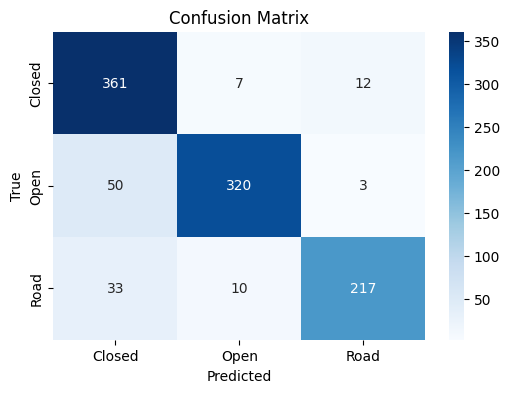

C:\Users\kaila\AppData\Local\Temp\ipykernel_23580\1897696447.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=f1_scores[0], palette='Blues')


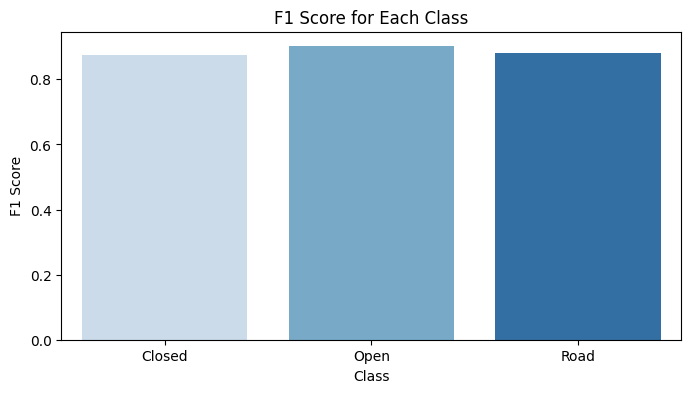

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


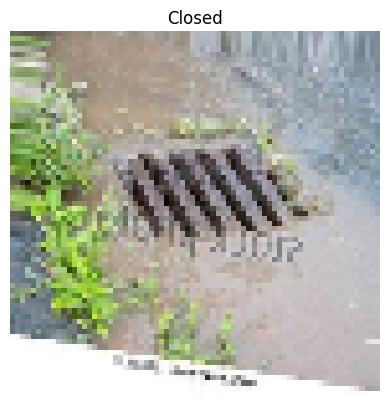

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


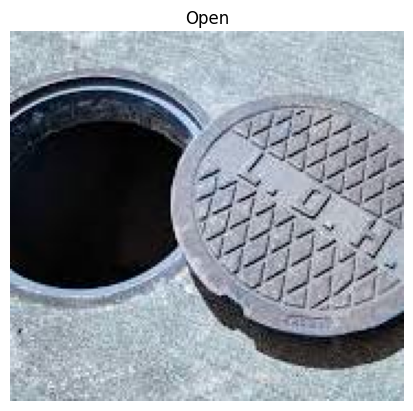

In [5]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(data_test_p, labels_test_one_hot)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc * 100, "%")

# Predict the labels for the test data
y_pred = model.predict(data_test_p)

# Convert the one-hot encoded predictions back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
labels_test_encoded = label_encoder.transform(labels_test)

# Calculate the F1 score
f1 = f1_score(labels_test_encoded, y_pred_labels, average='weighted')
print('F1 Score:', f1)

# Create a classification report to show precision, recall, and F1 score for each class
class_names = label_encoder.classes_
print('Classification Report:')
print(classification_report(labels_test_encoded, y_pred_labels, target_names=class_names))

# Create a confusion matrix
conf_matrix = confusion_matrix(labels_test_encoded, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Create a bar plot to show the F1 score for each class
f1_scores = [f1_score(labels_test_encoded, y_pred_labels, average=None)]
f1_scores.sort(reverse=True)
plt.figure(figsize=(8, 4))
sns.barplot(x=class_names, y=f1_scores[0], palette='Blues')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.show()

def showImg(img, name):
    plt.axis("off")
    plt.title(name)
    plt.imshow(img)
    plt.show()

x_ = randint(0, data_test_p.shape[0] - 1)
predicted_labels = model.predict(np.expand_dims(data_test_p[x_], axis=0))
predicted_label = np.argmax(predicted_labels)
predicted_manhole = label_encoder.inverse_transform([predicted_label])[0]
showImg(data_test[x_], predicted_manhole)

image_path = "C:/Users/kaila/OneDrive/Desktop/download.jpg"
img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_resized = cv2.resize(img_gray, (72, 72), interpolation=cv2.INTER_AREA)
img_input = np.expand_dims(np.expand_dims(img_resized, axis=0), axis=-1)
predicted_labels = model.predict(img_input)
predicted_label = np.argmax(predicted_labels)
predicted_manhole = label_encoder.inverse_transform([predicted_label])[0]
showImg(img, predicted_manhole)

In [1]:
!pip install playsound

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7046 sha256=0b0f3958729e03209e921b06f143bc180744d52177102b4ac77bee041866cc26
  Stored in directory: c:\users\vk768\appdata\local\pip\cache\wheels\50\98\42\62753a9e1fb97579a0ce2f84f7db4c21c09d03bb2091e6cef4
Successfully built playsound


In [2]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from playsound import playsound

# Load your trained model
model = tf.keras.models.load_model('C:\Users\vk768\OneDrive\Desktop\MY\Research&Projects\CNN_ManHole\Project\Manhole detection\notebooks\model.h5')

# Label encoder to decode predictions
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Closed', 'Open', 'Road'])

# Function to preprocess video frames
def preprocess_frame(frame):
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (72, 72), interpolation=cv2.INTER_AREA)
    img_input = np.expand_dims(np.expand_dims(img_resized, axis=-1), axis=0)
    return img_input

# Function to display live video with bounding boxes and labels
def display_live_video():
    cap = cv2.VideoCapture(0)  # Use 0 for the default webcam
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Preprocess the frame
        img_input = preprocess_frame(frame)
        
        # Predict the label
        predicted_labels = model.predict(img_input)
        predicted_label = np.argmax(predicted_labels)
        predicted_manhole = label_encoder.inverse_transform([predicted_label])[0]
        
        # Draw bounding box and label
        label_position = (50, 50)
        cv2.putText(frame, predicted_manhole, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.rectangle(frame, (10, 10), (300, 100), (0, 255, 0), 2)
        
        # Trigger alarm if an open manhole is detected
        if predicted_manhole == 'Open':
            playsound('C:\Users\vk768\OneDrive\Desktop\MY\Research&Projects\CNN_ManHole\Project\Manhole detection\notebooks\sound.wav')
        
        # Display the frame
        cv2.imshow('Manhole Detection', frame)
        
        # Break loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Start the live video detection
display_live_video()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

ERROR:playsound:
    Error 259 for command:
        play C:/Users/kaila/Downloads/sound.wav wait
    The driver cannot recognize the specified command parameter.


PlaysoundException: 
    Error 259 for command:
        play C:/Users/kaila/Downloads/sound.wav wait
    The driver cannot recognize the specified command parameter.

: 

In [1]:
import cv2
import numpy as np
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model("C:/Users/kaila/OneDrive/Desktop/model.h5")

# Function to preprocess video frames
def preprocess_frame(frame):
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (72, 72), interpolation=cv2.INTER_AREA)
    img_input = np.expand_dims(np.expand_dims(img_resized, axis=-1), axis=0)
    return img_input

# Function to classify manhole condition
def classify_manhole_condition(frame):
    # Preprocess the frame
    img_input = preprocess_frame(frame)
    
    # Predict the label
    predicted_labels = model.predict(img_input)
    predicted_label = np.argmax(predicted_labels)
    
    # Decode predicted label
    if predicted_label == 0:
        return "Closed"
    elif predicted_label == 1:
        return "Open"
    else:
        return "Road"

# Function to display live video with manhole condition
def display_live_video():
    cap = cv2.VideoCapture(0)  # Use 0 for the default webcam
    
    if not cap.isOpened():
        print("Error: Could not open video stream.")
        return
    
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            break
        
        # Classify manhole condition
        condition = classify_manhole_condition(frame)
        
        # Draw condition label on frame
        label_position = (50, 50)
        cv2.putText(frame, condition, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Display the frame
        cv2.imshow('Manhole Detection', frame)
        
        # Break loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Start the live video detection
display_live_video()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from playsound import playsound

# Load your trained model
model = tf.keras.models.load_model('C:/Users/kaila/OneDrive/Desktop/model.h5')

# Label encoder to decode predictions
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Closed', 'Open', 'Road'])

# Function to preprocess video frames
def preprocess_frame(frame):
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (72, 72), interpolation=cv2.INTER_AREA)
    img_input = np.expand_dims(np.expand_dims(img_resized, axis=-1), axis=0)
    return img_input

# Function to display live video with bounding boxes and labels
def display_live_video():
    cap = cv2.VideoCapture(0)  # Use 0 for the default webcam
    
    if not cap.isOpened():
        print("Error: Could not open video stream.")
        return
    
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            break
        
        # Preprocess the frame
        img_input = preprocess_frame(frame)
        
        # Predict the label
        predicted_labels = model.predict(img_input)
        predicted_label = np.argmax(predicted_labels)
        predicted_manhole = label_encoder.inverse_transform([predicted_label])[0]
        
        # Draw bounding box and label
        label_position = (50, 50)
        cv2.putText(frame, predicted_manhole, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Trigger alarm if an open manhole is detected
        if predicted_manhole == 'Open':
            playsound('C:/Users/kaila/Downloads/sound.wav')
        
        # Display the frame
        cv2.imshow('Manhole Detection', frame)
        
        # Break loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Start the live video detection
display_live_video()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


ERROR:playsound:
    Error 259 for command:
        play C:/Users/kaila/Downloads/sound.wav wait
    The driver cannot recognize the specified command parameter.


PlaysoundException: 
    Error 259 for command:
        play C:/Users/kaila/Downloads/sound.wav wait
    The driver cannot recognize the specified command parameter.